In [19]:
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from numpy import array
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from tensorflow import keras

In [20]:
gpus = tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_virtual_device_configuration(gpus[0], [
    tf.config.experimental.VirtualDeviceConfiguration(memory_limit=1024)])

IndexError: list index out of range

In [21]:
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the sequence
        if end_ix > len(sequence) - 1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)

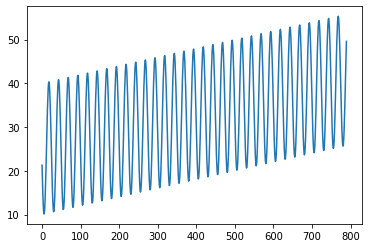

In [22]:
df = pd.read_csv("~/Documentos/recurrent_practices/recurrent_tensorflowkeras/data/fa_increasing_trend.data", header=None)

raw_seq = df.values
plt.figure(1)
plt.plot(raw_seq)
plt.show()

In [23]:
n_steps = 20
X, y = split_sequence(raw_seq, n_steps)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=False)

n_features = 1
hidden = 50
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], n_features))
X_train.shape

(577, 20, 1)

In [24]:
main_input = keras.Input(shape=(X_train.shape[1:]))
lstm_out = keras.layers.LSTM(units=hidden, activation='relu', input_shape=(n_steps, n_features))(main_input)
x = keras.layers.Dense(50, activation='relu')(lstm_out)
x = keras.layers.Dense(1)(x)
model = keras.Model(inputs=[main_input], outputs=[x])

model.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 20, 1)]           0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 50)                10400     
_________________________________________________________________
dense_7 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 51        
Total params: 13,001
Trainable params: 13,001
Non-trainable params: 0
_________________________________________________________________


In [25]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.01), loss='mean_squared_error')

history = model.fit(X_train, y_train, epochs=20,
                    batch_size=20,
                    validation_split=0.1,
                    verbose=1,
                    shuffle=False)

Train on 519 samples, validate on 58 samples
Epoch 1/20
519/519 [==============================] - 1s 2ms/sample - loss: 862.6867 - val_loss: 196.6131
Epoch 2/20
519/519 [==============================] - 0s 289us/sample - loss: 85.8615 - val_loss: 43.7474
Epoch 3/20
519/519 [==============================] - 0s 283us/sample - loss: 59.9746 - val_loss: 46.9528
Epoch 4/20
519/519 [==============================] - 0s 278us/sample - loss: 42.2765 - val_loss: 7.4684
Epoch 5/20
519/519 [==============================] - 0s 318us/sample - loss: 17.2008 - val_loss: 5.7468
Epoch 6/20
519/519 [==============================] - 0s 299us/sample - loss: 21.2471 - val_loss: 4.8039
Epoch 7/20
519/519 [==============================] - 0s 279us/sample - loss: 11.3356 - val_loss: 3.8947
Epoch 8/20
519/519 [==============================] - 0s 281us/sample - loss: 4.1290 - val_loss: 1.5658
Epoch 9/20
519/519 [==============================] - 0s 277us/sample - loss: 5.6206 - val_loss: 1.3685
Epoch 10/

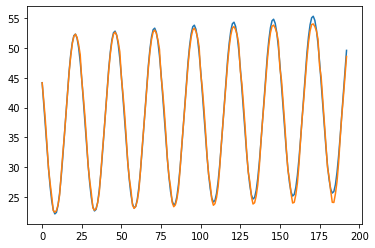

MAE: 0.550672602172219


In [26]:
x_input = X_test
yhat = model.predict(x_input, verbose=0)

plt.figure(2)
plt.plot(y_test)
plt.plot(yhat)
plt.show()

print("MAE: " + str(mean_absolute_error(yhat, y_test)))

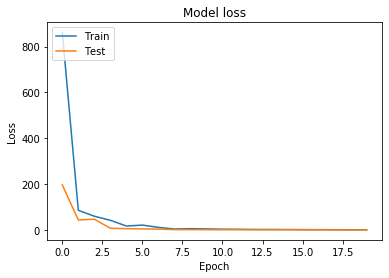

In [27]:
# Plot training & validation loss values
plt.figure(3)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()